In [2]:
# simple Pascal's triangle realisation
# populated with Pascal's triangle rows give an infinite sequence of finite sequences
# this implementation support few printing styles


import math

class PascalsTriangle():

    def __init__(self, rowcount):
        self.rowcount = rowcount
        self.pt = self._create()

    def _create(self):
        """Create an empty list and then append lists of 0s, each list one longer than the previous"""
        return [[0] * r for r in range(1, self.rowcount + 1)]

    def populate(self):
        """Populate an uninitialized list with actual values"""
        for r in range(0, len(self.pt)):
            for c in range(0, len(self.pt[r])):
                self.pt[r][c] = math.factorial(r) / (math.factorial(c) * math.factorial(r - c))

    def print_left(self):
        """Prints the triangle in a left-aligned format to demonstrate data structure"""
        for r in range(0, len(self.pt)):
            for c in range(0, len(self.pt[r])):
                print('{:>4}'.format(int(self.pt[r][c])), end="")
            print()

    def print_centre(self):
        """Prints the triangle in a conventional centred format"""
        inset = int(((((len(self.pt) * 2) - 1) / 2) * 3))
        for r in range(0, len(self.pt)):
            print(" " * inset, end="")
            for c in range(0, len(self.pt[r])):
                print('{:>3}   '.format(int(self.pt[r][c])), end="")
            print()
            inset -= 3

In [33]:
# networkx Pascal's triangle realisation
# populated with Pascal's triangle rows give an infinite sequence of finite sequences
# fillin graph objects from populated triangle
# include plotting method with colorisation support 


import networkx as nx
import matplotlib.pyplot as plt


class GraphTriangle(PascalsTriangle):
    
    def __init__(self, rowcount):
        super(GraphTriangle, self).__init__(rowcount)
        self.populate()
        self.G = nx.DiGraph()
        self._create_root_node()
        self._fill_graph()
        
    def _create_root_node(self):
        self.G.add_node(f"{0}_{0}", weight=1)
        
    def _fill_graph(self):
        """Fill graph enumerating throw previously generated list respecting to weight attribute"""
        for y, l in enumerate(self.pt[1:]):
            row_len = len(l)
            for x, w in enumerate(l):
                self.G.add_node(f"{y+1}_{x}", weight=w)
                if x == 0:
                    self.G.add_edge(f"{y}_{x}",   f"{y+1}_{x}")
                elif x == row_len-1:
                    self.G.add_edge(f"{y}_{x-1}", f"{y+1}_{x}")
                else:
                    self.G.add_edge(f"{y}_{x}",   f"{y+1}_{x}")
                    self.G.add_edge(f"{y}_{x-1}", f"{y+1}_{x}")
    
    def plot_digraph(self, color_node=False):
        """PLot graph with pydot, set fig_size and draw nodes, edges and labels"""
        labels = {n:int(w['weight']) for n, w in self.G.nodes(data=True)}
        
        node_colors='#eecccc'
        if color_node:
            node_colors = [w for r in digraph.pt for w in r]
        pos = nx.drawing.nx_pydot.pydot_layout(self.G, prog='dot')
        
        box_size = len(self.pt) + 1
        box_size = 9 if box_size < 9 else box_size
        plt.figure(1,figsize=(box_size,box_size)) 
        
        nx.draw_networkx_nodes(self.G, pos, node_size=2000,
                               edgecolors='#000000', linewidths=1, 
                               node_color=node_colors, vmin=min(node_colors), vmax=max(node_colors),
                               cmap='Set3')
        nx.draw_networkx_edges(self.G, pos, edgelist=self.G.edges(), arrows=False, width=1)
        nx.draw_networkx_labels(self.G, pos, labels=labels, font_size=8);
        
        plt.show()

In [50]:
digraph = GraphTriangle(15)
type(digraph.G)

networkx.classes.digraph.DiGraph

In [51]:
nx.classes.digraph.DiGraph

networkx.classes.digraph.DiGraph

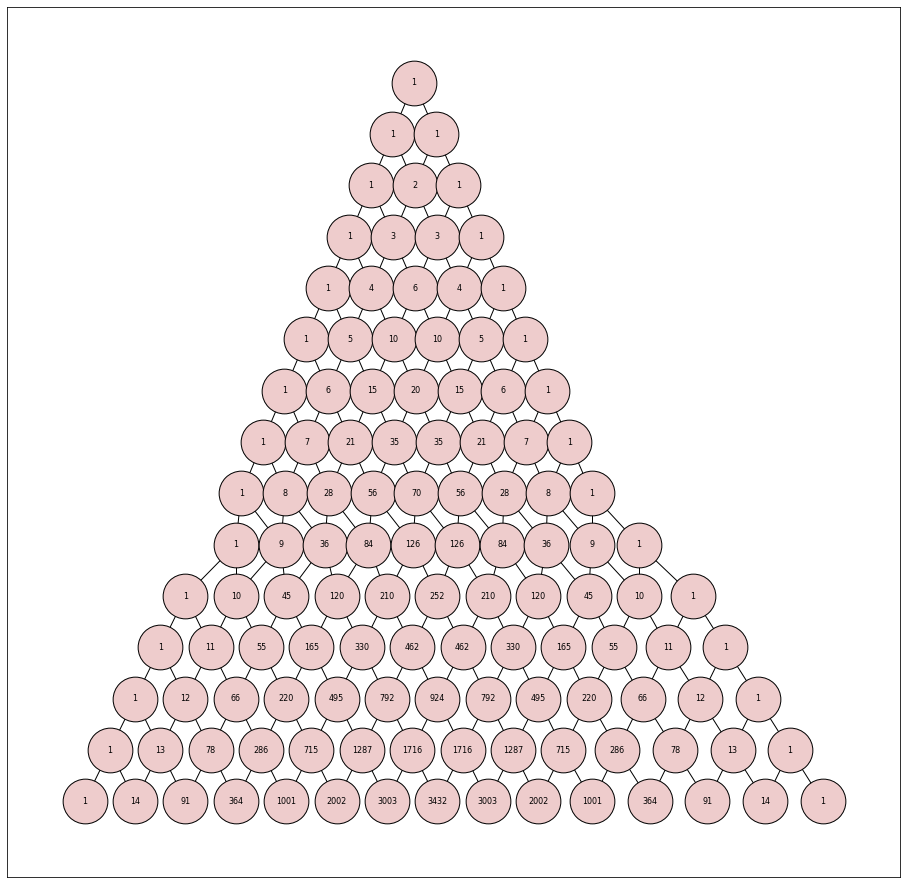

In [52]:
digraph.plot_digraph()

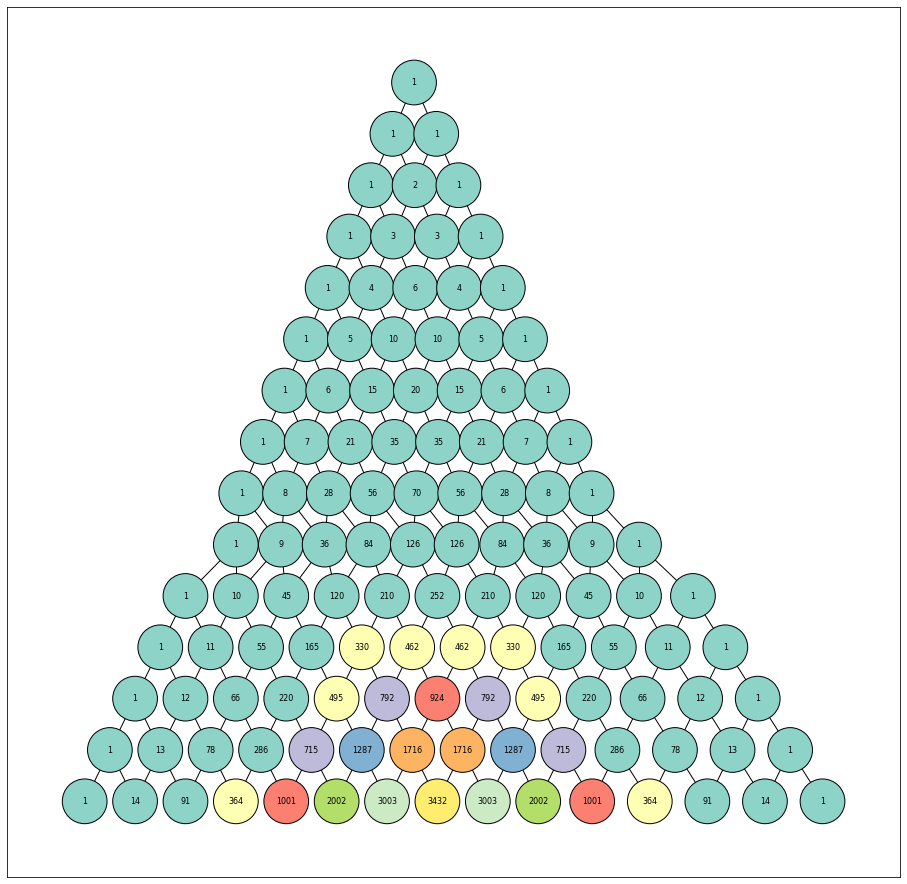

In [53]:
digraph.plot_digraph(color_node=True)